In [ ]:
  import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the dataset
df = pd.read_csv('Uber.csv')

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# Clean the dataset
df = df[df['START_DATE*'] != 'Totals']
df = df[df['END_DATE*'] != 'Totals']

In [ ]:
# Convert 'START_DATE*' and 'END_DATE*' to datetime
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

# Combine 'START*' and 'STOP*' into a new 'ROUTE*' field
df['ROUTE*'] = df['START*'] + ' to ' + df['STOP*']

# Create a frequency encoding for 'ROUTE*'
route_frequency = df['ROUTE*'].value_counts(normalize=True)
df['ROUTE_FREQ'] = df['ROUTE*'].map(route_frequency)

# Extract hour and day of week from 'START_DATE*'
df['HOUR*'] = df['START_DATE*'].dt.hour
df['DAY_OF_WEEK*'] = df['START_DATE*'].dt.day_name()

In [ ]:
# Enhancing Driver Matching

In [ ]:
# Clustering 1

C:\Users\SATHYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


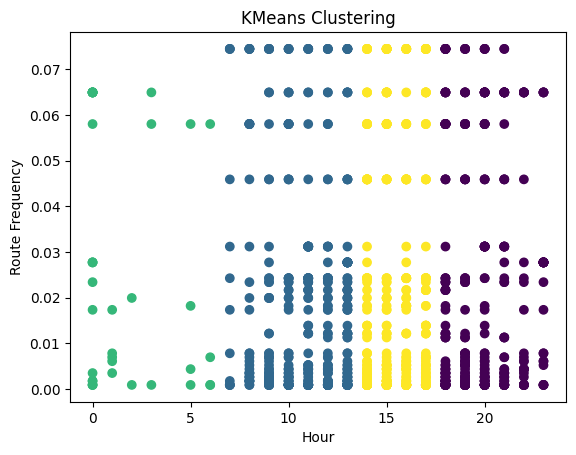

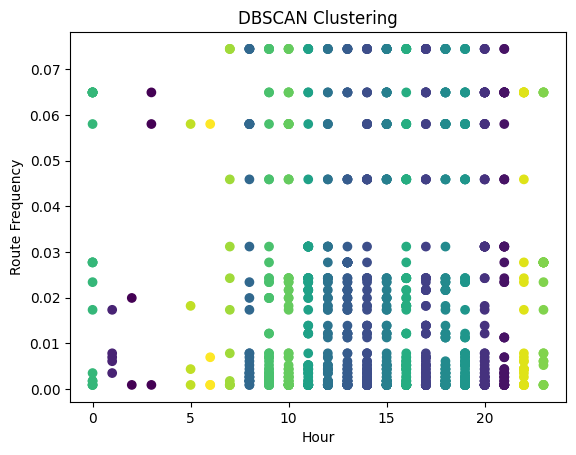

In [ ]:
# Get the features for clustering
features = df[['ROUTE_FREQ', 'HOUR*']]

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
df['kmeans_labels'] = kmeans.labels_

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(features)
df['dbscan_labels'] = dbscan.labels_

# Visualize the clusters from KMeans
plt.scatter(df['HOUR*'], df['ROUTE_FREQ'], c=df['kmeans_labels'])
plt.xlabel('Hour')
plt.ylabel('Route Frequency')
plt.title('KMeans Clustering')
plt.show()

# Visualize the clusters from DBSCAN
plt.scatter(df['HOUR*'], df['ROUTE_FREQ'], c=df['dbscan_labels'])
plt.xlabel('Hour')
plt.ylabel('Route Frequency')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
df['count'] = 1

# For KMeans Clustering 1
kmeans_1_sizes = df.groupby('kmeans_labels')['count'].sum().reset_index()

print("\nKMeans Clustering 1:")
print("-----------------------")
for index, row in kmeans_1_sizes.iterrows():
    cluster_label = row['kmeans_labels']
    cluster_size = row['count']

    cluster_data = df[df['kmeans_labels'] == cluster_label]

    print("\nCluster", cluster_label)
    print("Hours:\n", sorted(cluster_data['HOUR*'].unique()))
    print("Average Count =", cluster_size)

# For DBSCAN Clustering 1
dbscan_1_sizes = df.groupby('dbscan_labels')['count'].sum().reset_index()

print("\nDBSCAN Clustering 1:")
print("-----------------------")
for index, row in dbscan_1_sizes.iterrows():
    cluster_label = row['dbscan_labels']
    cluster_size = row['count']

    cluster_data = df[df['dbscan_labels'] == cluster_label]

    print("\nCluster", cluster_label)
    print("Hours:\n", sorted(cluster_data['HOUR*'].unique()))
    print("Average Count =", cluster_size)


KMeans Clustering 1:
-----------------------

Cluster 0
Hours:
 [18, 19, 20, 21, 22, 23]
Average Count = 341

Cluster 1
Hours:
 [7, 8, 9, 10, 11, 12, 13]
Average Count = 407

Cluster 2
Hours:
 [0, 1, 2, 3, 5, 6]
Average Count = 37

Cluster 3
Hours:
 [14, 15, 16, 17]
Average Count = 370

DBSCAN Clustering 1:
-----------------------

Cluster -1
Hours:
 [2, 3]
Average Count = 5

Cluster 0
Hours:
 [21]
Average Count = 51

Cluster 1
Hours:
 [1]
Average Count = 5

Cluster 2
Hours:
 [20]
Average Count = 71

Cluster 3
Hours:
 [17]
Average Count = 95

Cluster 4
Hours:
 [14]
Average Count = 89

Cluster 5
Hours:
 [13]
Average Count = 94

Cluster 6
Hours:
 [8]
Average Count = 35

Cluster 7
Hours:
 [12]
Average Count = 77

Cluster 8
Hours:
 [15]
Average Count = 98

Cluster 9
Hours:
 [18]
Average Count = 94

Cluster 10
Hours:
 [19]
Average Count = 68

Cluster 11
Hours:
 [11]
Average Count = 72

Cluster 12
Hours:
 [16]
Average Count = 88

Cluster 13
Hours:
 [0]
Average Count = 19

Cluster 14
Hours:


In [ ]:
# Clustering 2

In [ ]:
# Convert 'DAY_OF_WEEK*' to numerical for clustering
le = LabelEncoder()
df['DAY_OF_WEEK_ENCODED*'] = le.fit_transform(df['DAY_OF_WEEK*'])

# Get the features for clustering
features = df[['ROUTE_FREQ', 'HOUR*', 'DAY_OF_WEEK_ENCODED*']]

C:\Users\SATHYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


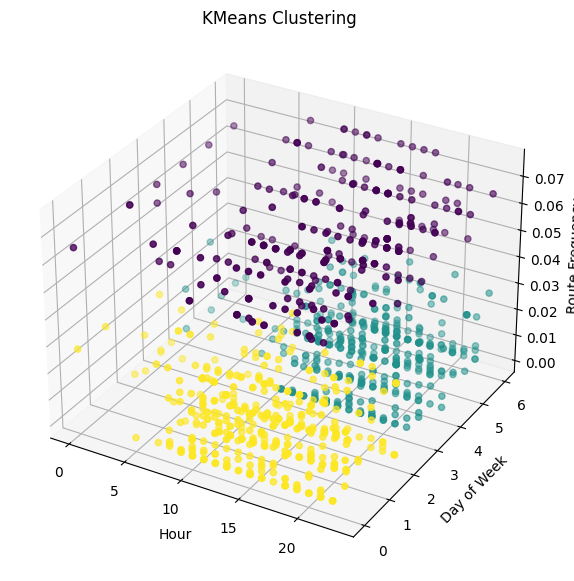

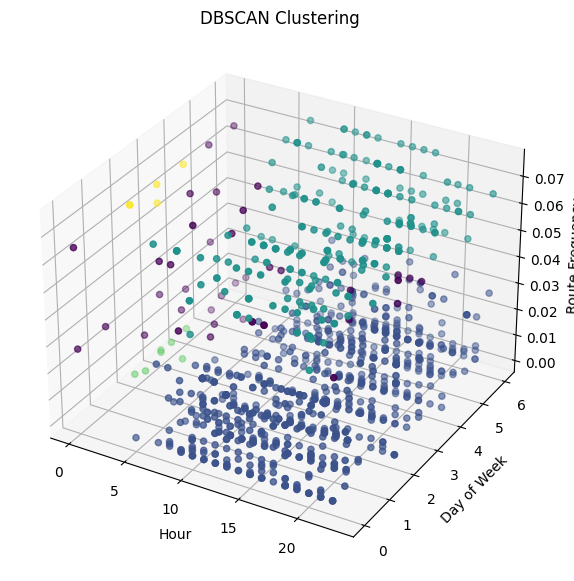

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_scaled)
df['kmeans_labels'] = kmeans.labels_

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(features_scaled)
df['dbscan_labels'] = dbscan.labels_

# Visualize the clusters from KMeans
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['HOUR*'], df['DAY_OF_WEEK_ENCODED*'], df['ROUTE_FREQ'], c=df['kmeans_labels'])
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_zlabel('Route Frequency')
ax.set_title('KMeans Clustering')
plt.show()

# Visualize the clusters from DBSCAN
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['HOUR*'], df['DAY_OF_WEEK_ENCODED*'], df['ROUTE_FREQ'], c=df['dbscan_labels'])
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_zlabel('Route Frequency')
ax.set_title('DBSCAN Clustering')
plt.show()

In [ ]:
# For KMeans Clustering 2
kmeans_2_sizes = df.groupby('kmeans_labels')['count'].sum().reset_index()

print("\nKMeans Clustering 2:")
print("-----------------------")

for index, row in kmeans_2_sizes.iterrows():
    cluster_label = row['kmeans_labels']
    cluster_size = row['count']
    cluster_data = df[df['kmeans_labels'] == cluster_label]
    print("\nCluster", cluster_label)
    print("Hours:\n", sorted(cluster_data['HOUR*'].unique()))
    print("Days of Week:\n", sorted(cluster_data['DAY_OF_WEEK*'].unique()))
    print("Average Count =", cluster_size)

# For DBSCAN Clustering 2
dbscan_2_sizes = df.groupby('dbscan_labels')['count'].sum().reset_index()

print("\nDBSCAN Clustering 2:")
print("-----------------------")

for index, row in dbscan_2_sizes.iterrows():
    cluster_label = row['dbscan_labels']
    cluster_size = row['count']
    cluster_data = df[df['dbscan_labels'] == cluster_label]
    print("\nCluster", cluster_label)
    print("Hours:\n", sorted(cluster_data['HOUR*'].unique()))
    print("Days of Week:\n", sorted(cluster_data['DAY_OF_WEEK*'].unique()))
    print("Average Count =", cluster_size)



KMeans Clustering 2:
-----------------------

Cluster 0
Hours:
 [0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Days of Week:
 ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Average Count = 277

Cluster 1
Hours:
 [0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Days of Week:
 ['Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Average Count = 426

Cluster 2
Hours:
 [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Days of Week:
 ['Friday', 'Monday', 'Saturday', 'Sunday']
Average Count = 452

DBSCAN Clustering 2:
-----------------------

Cluster -1
Hours:
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 19, 20, 21, 22, 23]
Days of Week:
 ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Average Count = 40

Cluster 0
Hours:
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Days of Week:
 ['Friday', 'Monday', 'Saturday', 

In [ ]:
# Predicting Accurate Arrival Time Estimates

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate ride duration in minutes
df['DURATION*'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60

# Drop rows with null or missing values in 'MILES*', 'DURATION*'
df = df.dropna(subset=['MILES*', 'DURATION*'])

df['PURPOSE*'] = df['PURPOSE*'].fillna('UNKNOWN')

# One hot encoding for categorical variables
features_to_encode = ['START*', 'STOP*', 'CATEGORY*']
for feature in features_to_encode:
    one_hot = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop(feature, axis=1)
    df = df.join(one_hot)

# If there are still categorical columns, transform them too
categorical_columns = df.select_dtypes(include=[object]).columns
for column in categorical_columns:
    if column not in ['START_DATE*', 'END_DATE*', 'PURPOSE*']:
        one_hot = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)

# Define predictors and target variable
X = df.drop(['START_DATE*', 'END_DATE*', 'DURATION*', 'PURPOSE*'], axis=1)
y = df['DURATION*']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=24),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=24),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=24),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'booster': ['gbtree', 'gblinear', 'dart']
        }
    }
}

# Iterate over the models
for name, model_params in models_params.items():
    # Perform grid search
    grid_search = GridSearchCV(estimator=model_params['model'], param_grid=model_params['params'], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Use the best parameters to fit the model
    best_model = model_params['model'].set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate and print the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"The MSE of the best {name} model is {mse:.2f}")
    print(f"The MAE of the best {name} model is {mae:.2f}\n")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The MSE of the best LinearRegression model is 50090005905529131499520.00
The MAE of the best LinearRegression model is 62840857909.33

Fitting 5 folds for each of 45 candidates, totalling 225 fits
The MSE of the best DecisionTreeRegressor model is 491.61
The MAE of the best DecisionTreeRegressor model is 9.89

Fitting 5 folds for each of 81 candidates, totalling 405 fits
The MSE of the best RandomForestRegressor model is 304.08
The MAE of the best RandomForestRegressor model is 8.91

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The MSE of the best KNeighborsRegressor model is 285.78
The MAE of the best KNeighborsRegressor model is 8.50

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The MSE of the best SVR model is 306.10
The MAE of the best SVR model is 8.78

Fitting 5 folds for each of 81 candidates, totalling 405 fits
The MSE of the best XGBRegressor model is 299.65
The MAE of the best XGBRegre

In [ ]:
#Traning the model with KNKNeighborsRegressor as it provides the best MAE & MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_params = {
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
}
}


# Iterate over the models
for name, model_params in models_params.items():
    # Perform grid search
    grid_search = GridSearchCV(estimator=model_params['model'], param_grid=model_params['params'], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Use the best parameters to fit the model
    best_model = model_params['model'].set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate and print the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"The MSE of the best {name} model is {mse:.2f}")
    print(f"The MAE of the best {name} model is {mae:.2f}\n")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The MSE of the best KNeighborsRegressor model is 285.78
The MAE of the best KNeighborsRegressor model is 8.50



In [ ]:
best_model

KNeighborsRegressor(metric='euclidean', n_neighbors=9, weights='distance')

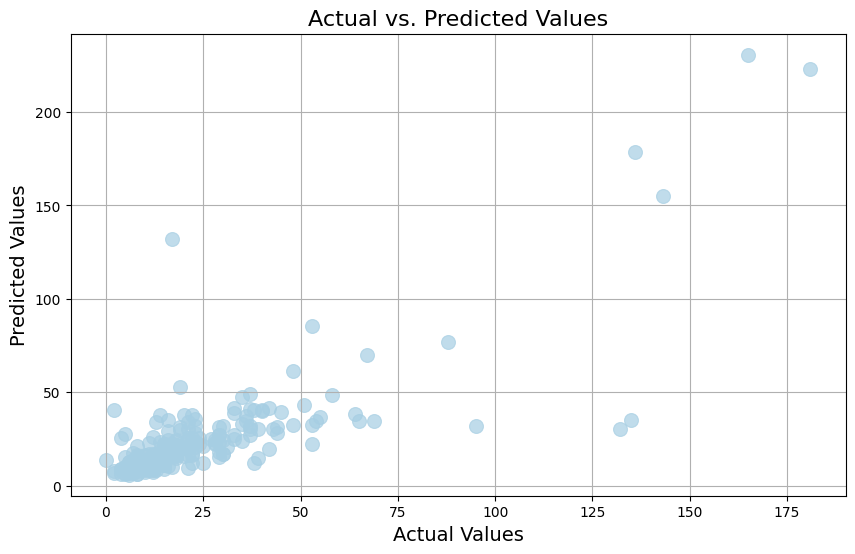

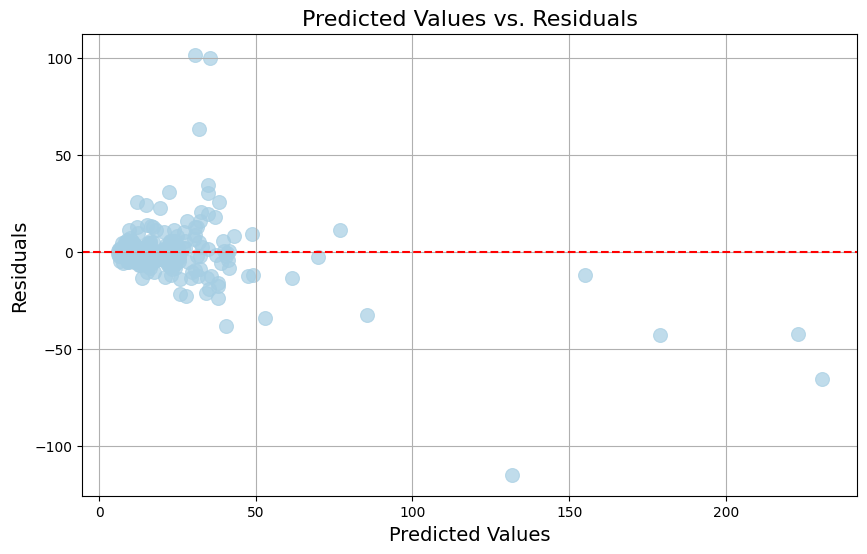

In [ ]:
import seaborn as sns

# Make predictions
y_pred = best_model.predict(X_test)

# Set a color palette
sns.set_palette("Paired")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=100, alpha=0.7, edgecolor=None)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Actual vs. Predicted Values", fontsize=16)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, s=100, alpha=0.7, edgecolor=None)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title("Predicted Values vs. Residuals", fontsize=16)
plt.grid(True)
plt.show()